In [1]:
import kaleido
import pandas as pd
import glob
import json
import os

In [107]:
meta_files = os.listdir("figure_metas/")
file_id = 0

In [108]:
meta_files = [file for file in meta_files if not file.startswith('.')]
meta_files

['15-25-training-full.json']

In [116]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

# naming a layout theme for future reference
pio.templates["google"] = go.layout.Template(
    layout_colorway=['#FD3216','#00FE35','#00B5F6','#EEA6FB','#0DF9FF','#FF9616','#1CBE4F','#EEA6FB'] #Light24 #['#4285F4', '#DB4437', '#F4B400', '#0F9D58', '#185ABC', '#B31412', '#EA8600', '#137333', '#d2e3fc', '#ceead6']
) # 1CBE4F

# setting Google color palette as default
pio.templates.default = "google"

file_id = 0

In [117]:
#### 
# get data file names

# CREATE META DATA FOR NEW PLOT
#figure_meta = {
#    'key_path': 'log_dir/evals/csvs/rew', # updateloss, testreward, LR, avg_cost, updatelossactor, evalrew
#    #'key_paths': ["log_dir_thesis/csvs/testreward", "log_dir_thesis/csvs/testreward", "log_dir_thesis/csvs/testreward", "log_dir_thesis/csvs/testreward", "log_dir_thesis/csvs/testreward", "log_dir_thesis/csvs/avg_cost", "log_dir_thesis/csvs/avg_cost"],
#    'y_df_label': 'rew', # test/reward, LR, avg_cost, update/loss/critic2
#    #'y_df_labels': ["test/reward", "test/reward", "test/reward", "test/reward", "test/reward", "avg_cost", "avg_cost"],
#    'invert_y': True, #[True, True, True, True, True, False, False],
#    'x_df_label': 'Steps',
#    #'x_multiplier': 2560,
#    'y_display_label': 'average solution length',
#    'x_display_label': 'number of samples trained', # number of samples trained, problem size
#    'run_names': ["run_126__20230823T094932_20230823T192656", "run_127__20230823T094935_20230824T095935", "run_128__20230823T094939_20230824T100113", "run_167__20230823T013125_20230823T185537"],
#    'line_names': ["1", "2", "3", "4"],#["DQN", "PG", "SAC", "A2C", "PPO", "PG Kool no baseline", "PG Kool with baseline"],
#    'plot_filename': 'test_1',
#    'legend_title': 'Algorithm',
#    'is_reward_plot': False,
#    'y_type': 'linear',
#    'legend_x': 0.99, # 0.99
#    'legend_y': 0.55,  # 0.84
#    'min_x': 0,
#    'max_x': 100,
#    'min_y': 1.0, #  3.0
#    'max_y': 12.5,# 10.8
#    'tsp_lines': False,
#    'op_lines': False,
#    'kool_thinning': 1,
#    'marker_size': 10
#}

# LOADING META DATA OF EXISTING PLOT
meta_name = meta_files[file_id]
#file_id +=1
with open("figure_metas/" + meta_name) as json_file: #_loss
    figure_meta = json.load(json_file)



# ADJUST META DATA FIELDS

#figure_meta['legend_x'] = 0.89      # 0.99
#figure_meta['legend_y'] = 0.65      # 0.84


# UPDATE NEWLY-ADDED METADATA FIELDS WITH DEFAULT VALUES IN CASE THEY ARE MISSING
if 'scientific' not in figure_meta.keys():
    figure_meta['scientific'] = False
    
if 'x_multiplier' not in figure_meta.keys():
    figure_meta['x_multiplier'] = 1

if 'is_kool_plot' not in figure_meta.keys():
    figure_meta['is_kool_plot'] = False
    
if 'is_neg_loss_plot' not in figure_meta.keys():
    figure_meta['is_neg_loss_plot'] = False

if 'generalization_colors' not in figure_meta.keys():
    figure_meta['generalization_colors'] = False

# SET LOCAL VARIABLES FOR FOLLOWING CODE
filenames = figure_meta['run_names']
x_df_label = figure_meta['x_df_label']
y_display_label = figure_meta['y_display_label']
x_display_label = figure_meta['x_display_label']
plot_names = figure_meta['line_names']
x_mult = figure_meta['x_multiplier']
is_reward_plot = figure_meta['is_reward_plot']
invert_y = figure_meta['invert_y']
y_type = figure_meta['y_type']
legend_x = figure_meta['legend_x']
legend_y = figure_meta['legend_y']
min_x = figure_meta['min_x']
max_x = figure_meta['max_x']
min_y = figure_meta['min_y']
max_y = figure_meta['max_y']
tsp_lines = figure_meta['tsp_lines']
op_lines = figure_meta['op_lines']
kool_thinning = figure_meta['kool_thinning']
marker_size = figure_meta['marker_size']
scientific = figure_meta['scientific']

plot_dfs = []
filepaths = []
if 'key_paths' in figure_meta.keys() and len(figure_meta['key_paths']) > 0:
    assert(len(figure_meta['key_paths']) == len(filenames))
    y_df_labels = figure_meta['y_df_labels']
    for path_str, filename in zip(figure_meta['key_paths'], filenames):
        filepaths.append(path_str + "/" + filename + ".csv")
else:
    path = figure_meta['key_path']
    filepaths = [path + "/" + filename + ".csv" for filename in filenames]
    if not isinstance(invert_y, list):
        invert_y = [invert_y] * len(filepaths)
    y_df_labels = [figure_meta['y_df_label']] * len(filepaths)
    
for i, filepath in enumerate(filepaths):
    df = pd.read_csv(filepath, sep=';')
    if invert_y[i]:
        df[y_df_labels[i]] = -df[y_df_labels[i]]
    plot_dfs.append(df)

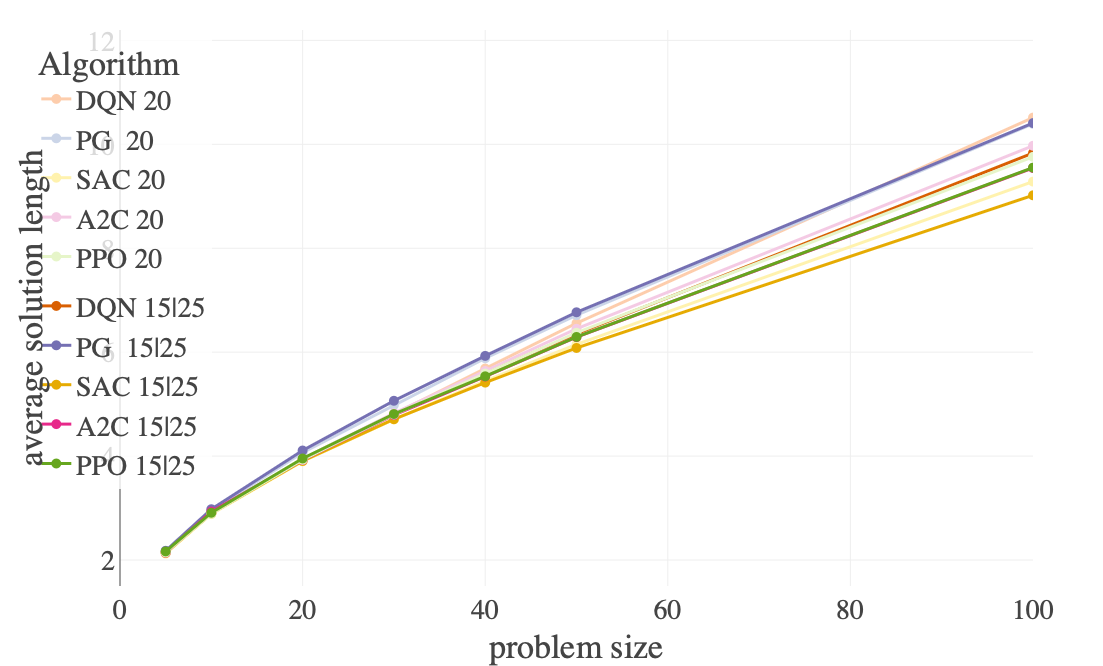

In [118]:
# https://plotly.com/python/plot-data-from-csv/
# https://stackoverflow.com/questions/64500472/plot-multiple-pandas-dataframes-in-one-graph-python-plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
#pio.kaleido.scope.mathjax = None # https://github.com/plotly/plotly.py/issues/3469

fig = go.Figure()
for i, (name, df) in enumerate(zip(plot_names, plot_dfs)):
    if "Kool" in name or figure_meta['is_kool_plot']:
        fig = fig.add_trace(go.Scatter(x = df[x_df_label][::kool_thinning] * x_mult, # 40
                                   y = df[y_df_labels[i]][::kool_thinning], 
                                   name = name,
                                   marker=dict(size=marker_size),
                                   line=dict(width=3))) # , marker=dict(size=10)
    else:
        line_specs = dict(width=3)
        is_legacy_result= False
        if figure_meta['generalization_colors']:
            is_legacy_result = name.endswith(' 20')
            if is_legacy_result:
                cmap = px.colors.qualitative.Pastel2
            else:
                cmap = px.colors.qualitative.Dark2
            color_id_map = {'DQN': 1, 'PG': 2, 'A2C': 3, 'PPO': 4, 'SAC': 5}
            color_id = color_id_map[name.split(' ')[0]]
            line_specs['color'] = cmap[color_id]
            
        fig = fig.add_trace(go.Scatter(x = df[x_df_label][::1] * x_mult,
                                   y = df[y_df_labels[i]][::1], 
                                   name = name,
                                   marker=dict(size=marker_size),
                                   line=line_specs,
                                   legendgroup=f"group{is_legacy_result}"))

fig.update_layout(
    font_family="libertine",
    font_size=28,
    autosize=False,
    width=2000,
    height=666,
    margin=dict(
        l=120,
        r=70,
        b=80,
        t=30,
        pad=4
    ),
    yaxis=dict(
        title_text=y_display_label,
        type="linear" if is_reward_plot else y_type,
        range=(min_y, max_y), 
        rangemode="tozero",
        tickformat='f' if y_type == 'log' else ('.0e' if scientific else None), #'.0e'
        
        ticktext=["-0.1", "-1", "-10", "-100", "-1000", "-10k", "-100k", "-1M", "-10M"] if figure_meta['is_neg_loss_plot'] else None,
        tickvals=[0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000] if figure_meta['is_neg_loss_plot'] else None,
        #tickmode="array",
        #titlefont=dict(size=30),
    ),
    xaxis=dict(
        title_text=x_display_label,
        range=None if is_reward_plot else (min_x, max_x), # x_mult*df[x_df_label].iloc[-1]
        rangemode="tozero",
        
        #ticktext=["Very long label", "long label", "3", "label"],
        #tickvals=[1, 2, 3, 4],
        #tickmode="array",
        #titlefont=dict(size=30),
    ),
    title=dict(
        #text=title,
    ),
    legend=dict(
        yanchor="top",
        y=legend_y, # 84   6
        xanchor="right",
        x=legend_x, #0.99,
        bgcolor='rgba(255,255,255,0.8)',
        #entrywidth=0.1, # change it to 0.3
        #entrywidthmode='fraction',
        #orientation='h',
        #y=1.2,
        #xanchor="center",
        #x=0.5
    ),
    legend_title_text=figure_meta['legend_title'],
    #paper_bgcolor="LightSteelBlue",
)
# https://plotly.com/python/horizontal-vertical-shapes/
if tsp_lines:
    fig.add_hline(y=10.43, line_dash="dot", annotation_text="random", annotation_position="bottom right")
    fig.add_hline(y=3.84, line_dash="dot", annotation_text="optimal", annotation_position="bottom right")
    
if op_lines:
    fig.add_hline(y=1.58, line_dash="dot", annotation_text="random", annotation_position="bottom right")
    fig.add_hline(y=5.39, line_dash="dot", annotation_text="optimal", annotation_position="bottom right")

#fig.add_hline(y=3.84, line_dash="dot", annotation_text="optimal (20)", annotation_position="bottom right")
#fig.add_hline(y=5.70, line_dash="dot", annotation_text="optimal (50)", annotation_position="bottom right")
#fig.add_hline(y=7.76, line_dash="dot", annotation_text="optimal (100)", annotation_position="bottom right")

fig.show()
fig.write_image("figures/" + figure_meta['plot_filename'] + ".pdf")

with open("figure_metas/" + figure_meta['plot_filename'] + ".json", "w") as fp:
    json.dump(figure_meta,fp)
    

In [69]:
# extract data
dfs = []
for i, (name, df) in enumerate(zip(plot_names, plot_dfs)):
    df_dropped = df.reset_index().drop(labels=['Unnamed: 0', 'Wall_Time', 'index'], axis=1)
    df_dropped['version'] = name
    dfs.append(df_dropped)
df_full = pd.concat(dfs)
df_full

,rew,Steps,version
0,2.162781,5,DQN 20
1,2.895517,10,DQN 20
2,3.928514,20,DQN 20
3,4.810859,30,DQN 20
4,5.685634,40,DQN 20
...,...,...,...
2,3.953943,20,PPO 15|25
3,4.809214,30,PPO 15|25
4,5.535577,40,PPO 15|25
5,6.293019,50,PPO 15|25


In [81]:
df_full[df_full['Steps'] == 20].sort_values('rew').drop(labels=['Steps'], axis=1)

,rew,version
2,3.898242,SAC 20
2,3.905898,SAC 15|25
2,3.919991,DQN 15|25
2,3.923975,A2C 15|25
2,3.928514,DQN 20
2,3.928730,PPO 20
2,3.945055,A2C 20
2,3.953943,PPO 15|25
2,4.066647,PG 20
2,4.107558,PG 15|25
